In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                              title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                         1MB  2024-04-10 09:48:38          20526        457  1.0              
jainaru/world-happiness-report-2024-yearly-updated               World Happiness Report- 2024                       62KB  2024-05-15 19:04:34           1185         28  1.0              
sahirmaharajj/school-student-daily-attendance                    School Student Daily Attendance                     2MB  2024-04-29 19:29:56           5246        111  1.0              
jainaru/thyroid-disease-data                                     

In [6]:
! kaggle datasets download -d shree1992/housedata

Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 72.2MB/s]


In [7]:
!unzip housedata.zip

Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

In [9]:
train_df = pd.read_csv('data.csv')


# ***TRAIN DATASET***

In [10]:
train_df.shape

(4600, 18)

In [11]:
train_df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [12]:
train_df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [13]:
train_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [15]:
import pandas as pd
# Convert all features to numerical values
for col in train_df.columns:
  if train_df[col].dtype == 'object':
    train_df[col] = pd.Categorical(train_df[col]).codes

In [16]:
for col in train_df.columns:
  if train_df[col].dtype == 'float64':
    train_df[col] = train_df[col].astype(int)

In [17]:
train_df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,1522,36,62,0
1,0,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,3899,35,58,0
2,0,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,2291,18,26,0
3,0,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,4263,3,7,0
4,0,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,4352,31,31,0
5,0,490000,2,1,880,6380,1,0,0,3,880,0,1938,1994,3521,35,54,0
6,0,335000,2,2,1350,2560,1,0,0,3,1350,0,1976,0,2286,31,31,0
7,0,482000,4,2,2710,35868,2,0,0,3,2710,0,1989,0,2038,21,23,0
8,0,452500,3,2,2430,88426,1,0,0,4,1570,860,1985,0,3369,27,27,0
9,0,640000,4,2,1520,6200,1,0,0,3,1520,0,1945,2010,3846,35,54,0


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   date           4600 non-null   int8 
 1   price          4600 non-null   int64
 2   bedrooms       4600 non-null   int64
 3   bathrooms      4600 non-null   int64
 4   sqft_living    4600 non-null   int64
 5   sqft_lot       4600 non-null   int64
 6   floors         4600 non-null   int64
 7   waterfront     4600 non-null   int64
 8   view           4600 non-null   int64
 9   condition      4600 non-null   int64
 10  sqft_above     4600 non-null   int64
 11  sqft_basement  4600 non-null   int64
 12  yr_built       4600 non-null   int64
 13  yr_renovated   4600 non-null   int64
 14  street         4600 non-null   int16
 15  city           4600 non-null   int8 
 16  statezip       4600 non-null   int8 
 17  country        4600 non-null   int8 
dtypes: int16(1), int64(13), int8(4)
memory usage: 49

In [19]:
train_df.shape

(4600, 18)

In [20]:
train_df.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3705,60,1198000,4,3,3400,3850,2,0,0,3,2790,610,2008,0,1958,35,53,0
3124,52,400000,4,1,1700,20283,1,0,0,3,1340,360,1965,1993,1636,11,11,0
2153,38,554000,3,1,1760,10780,1,0,0,3,1760,0,1977,2004,1462,3,4,0
4412,20,0,3,3,1860,7440,1,0,0,5,1040,820,1954,0,181,35,71,0
4233,68,1037000,4,3,4440,10660,2,0,0,3,4440,0,2003,0,1013,25,37,0
3326,54,190000,1,0,930,29258,1,0,0,3,930,0,1941,1994,4046,35,71,0
342,6,207000,3,1,1490,8995,1,0,0,4,1490,0,1954,1979,568,35,69,0
3622,58,345000,3,2,1610,15005,1,0,0,4,1610,0,1986,0,2685,7,10,0
3011,49,775950,4,2,2970,4400,2,0,0,3,2970,0,2014,0,1268,31,31,0
4216,68,137124,3,1,960,27442,1,0,0,4,960,0,1970,0,1057,32,36,0


price
0          49
300000     42
400000     31
440000     29
450000     29
           ..
684680      1
609900      1
1635000     1
1339000     1
220600      1
Name: count, Length: 1741, dtype: int64


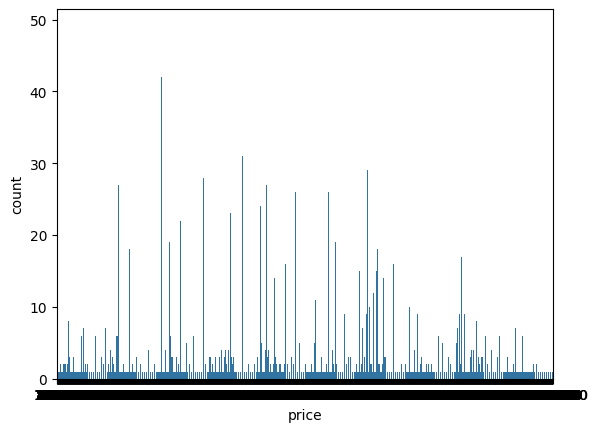

In [21]:
print(train_df['price'].value_counts())
sns.countplot(x='price',data=train_df)
plt.show()

In [22]:
target = "price"

# Separate features and target
X = train_df.drop(columns=[target])
Y = train_df[target]

In [23]:
X.head(10)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,1522,36,62,0
1,0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,3899,35,58,0
2,0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,2291,18,26,0
3,0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,4263,3,7,0
4,0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,4352,31,31,0
5,0,2,1,880,6380,1,0,0,3,880,0,1938,1994,3521,35,54,0
6,0,2,2,1350,2560,1,0,0,3,1350,0,1976,0,2286,31,31,0
7,0,4,2,2710,35868,2,0,0,3,2710,0,1989,0,2038,21,23,0
8,0,3,2,2430,88426,1,0,0,4,1570,860,1985,0,3369,27,27,0
9,0,4,2,1520,6200,1,0,0,3,1520,0,1945,2010,3846,35,54,0


In [24]:
Y.head(10)

0     313000
1    2384000
2     342000
3     420000
4     550000
5     490000
6     335000
7     482000
8     452500
9     640000
Name: price, dtype: int64

In [25]:
# prompt: PCA to train_df features reduce the features to 10

from sklearn.decomposition import PCA

pca = PCA(n_components=10)
train_df_reduced = pca.fit_transform(X)

In [26]:
train_df_reduced.shape

(4600, 10)

In [27]:
train_df_reduced = pd.DataFrame(train_df_reduced)
Z = pd.concat([train_df_reduced,Y],axis=1)
Z.head(10)

,0,1,2,3,4,5,6,7,8,9,price
0,-6947.628502,-768.939220,-1166.928210,894.430257,-326.320743,11.949816,-25.730232,29.907221,-0.099697,0.048565,313000
1,-5786.649121,1673.781145,2282.379832,-238.755857,-313.296529,78.319194,-3.735052,41.170744,2.326254,-1.386661,2384000
2,-2905.736112,6.187102,125.116671,-832.427524,-310.173214,6.546346,6.126251,40.355138,2.451305,-0.131761,342000
3,-6828.267308,1989.132852,-333.581444,-886.830767,942.418873,-25.512391,24.349210,43.127479,7.399589,-0.105643,420000
4,-4359.358306,2091.237007,-868.131440,1008.519081,547.653417,-33.992132,-11.875465,31.765435,-7.703368,0.800451,550000
5,-8486.252537,1212.012989,-1821.350110,684.385658,-275.638462,14.296784,-12.057624,33.552075,-1.978846,-0.510947,490000
6,-12298.749895,-24.738663,-587.143749,-1031.267169,-200.943272,-5.496811,-7.112796,35.588186,-7.453963,-0.762504,335000
7,21023.229008,-204.528149,1003.669295,-577.503550,-447.205652,-3.424683,-3.371156,37.617656,-0.679796,0.316564,482000
8,73571.391011,1160.576327,-266.572746,-824.955116,729.460678,-21.343127,-12.729996,31.533027,-4.901908,-0.097184,452500
9,-8659.576662,1558.740131,-967.170611,929.211192,-408.672177,16.253921,-14.540778,33.523328,-1.174788,0.944782,640000


In [28]:
Z.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
price    0
dtype: int64

In [29]:
Z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   1       4600 non-null   float64
 2   2       4600 non-null   float64
 3   3       4600 non-null   float64
 4   4       4600 non-null   float64
 5   5       4600 non-null   float64
 6   6       4600 non-null   float64
 7   7       4600 non-null   float64
 8   8       4600 non-null   float64
 9   9       4600 non-null   float64
 10  price   4600 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 395.4 KB


In [30]:
# prompt: convert Z to numerical
for col in Z.columns:
  if Z[col].dtype == 'float64':
    Z[col] = Z[col].astype(int)

In [31]:
Z.head(10)

,0,1,2,3,4,5,6,7,8,9,price
0,-6947,-768,-1166,894,-326,11,-25,29,0,0,313000
1,-5786,1673,2282,-238,-313,78,-3,41,2,-1,2384000
2,-2905,6,125,-832,-310,6,6,40,2,0,342000
3,-6828,1989,-333,-886,942,-25,24,43,7,0,420000
4,-4359,2091,-868,1008,547,-33,-11,31,-7,0,550000
5,-8486,1212,-1821,684,-275,14,-12,33,-1,0,490000
6,-12298,-24,-587,-1031,-200,-5,-7,35,-7,0,335000
7,21023,-204,1003,-577,-447,-3,-3,37,0,0,482000
8,73571,1160,-266,-824,729,-21,-12,31,-4,0,452500
9,-8659,1558,-967,929,-408,16,-14,33,-1,0,640000


In [32]:
train_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   1       4600 non-null   float64
 2   2       4600 non-null   float64
 3   3       4600 non-null   float64
 4   4       4600 non-null   float64
 5   5       4600 non-null   float64
 6   6       4600 non-null   float64
 7   7       4600 non-null   float64
 8   8       4600 non-null   float64
 9   9       4600 non-null   float64
dtypes: float64(10)
memory usage: 359.5 KB


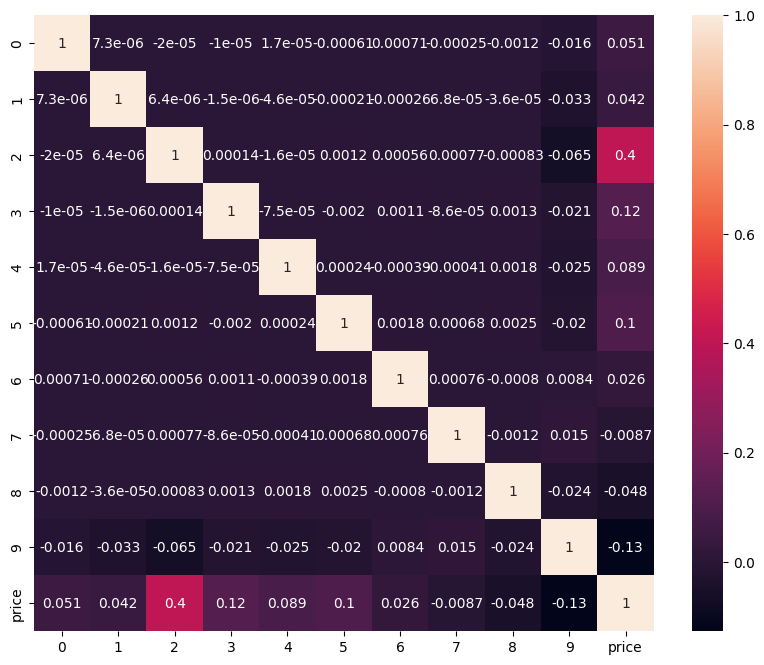

In [33]:
# prompt: correlation heatmap for for train_df_reduced

import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(Z).corr(), annot=True)
plt.show()


# ***Linear Regression***

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_lr = Z.drop(columns=["price"])
Y_lr = Z["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X_lr, Y_lr, test_size=0.2, random_state=42)

lr_model = LinearRegression()

lr_model.fit(X_train, Y_train)

Y_pred = lr_model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

rmse = np.sqrt(mse)



print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 987082254461.362
R-squared: 0.03212649594858741
Root Mean Squared Error (RMSE): 993520.1328918111


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate features and target
X_lr = train_df[['sqft_living','sqft_lot','sqft_above','sqft_basement', 'bathrooms', 'bedrooms']]  # Only using these three features
Y_lr = train_df["price"]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_lr, Y_lr, test_size=0.2, random_state=42)

# Initialize Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, Y_train)

# Take input for square footage, number of bathrooms, and number of bedrooms
sqft_living = float(input("Enter the sqft_living: "))
sqft_lot = float(input("Enter the sqft_lot: "))
sqft_above = float(input("Enter the sqft_above: "))
sqft_basement = float(input("Enter the sqft_basement: "))


bathrooms = int(input("Enter the number of bathrooms: "))
bedrooms = int(input("Enter the number of bedrooms: "))

# Create a DataFrame with the input values
input_data = pd.DataFrame([[sqft_living,sqft_basement,sqft_above,sqft_lot, bathrooms, bedrooms]], columns=["sqft_living","sqft_lot","sqft_above","sqft_basement", "bathrooms", "bedrooms"])

# Predict the house price
predicted_price = lr_model.predict(input_data)

print("Predicted House Price:", predicted_price[0])


Enter the sqft_living: 4600
Enter the sqft_lot: 4.600
Enter the sqft_above: 4621
Enter the sqft_basement: 4862
Enter the number of bathrooms: 4
Enter the number of bedrooms: 5
Predicted House Price: 1180282.9520806451
